<a href="https://colab.research.google.com/github/Jhansipothabattula/Data_Science/blob/main/Day176.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price prediction using Historical Data

Stock Price Data:
     Date  Close
0  738886    150
1  738887    152
2  738888    153
3  738889    155
4  738890    154

Mean Squared Error: 0.06023335316288063
R2 Score: 0.9950829915785404


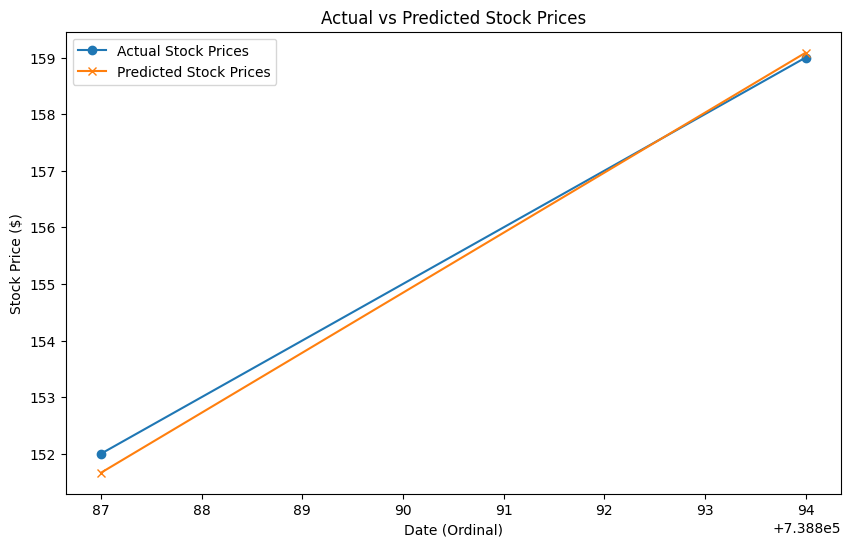

Predicted stock price: $161.21


In [1]:
# Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample historical stock price data
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Close': [150, 152, 153, 155, 154, 156, 157, 158, 159, 160]
}

# Convert the dataset into Dataframe
df = pd.DataFrame(data)

df['Date'] = df['Date'].map(pd.Timestamp.toordinal)

print("Stock Price Data:")
print(df.head())

X = df[['Date']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Initialization and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, label="Actual Stock Prices", marker='o')
plt.plot(X_test, y_pred, label="Predicted Stock Prices", marker='x')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Date (Ordinal)")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()

# Future Date Prediction
future_date = pd.Timestamp('2024-01-11').toordinal()
future_date_df = pd.DataFrame({'Date': [future_date]})

predicted_price = model.predict(future_date_df)
print(f"Predicted stock price: ${predicted_price[0]:.2f}")